## 공공데이터를 이용한 지역별 브랜드별 카페 정보 확인(2021)

**처리 목적**

- 공공데이터에서 관련 데이터를 수집해 카페업종의 현황을 확인


**명세사항**

1. 전국 카페 데이터를 모두 수집
2. 지역별 or 브랜드별 점포 현황을 확인
3. 결과를 시각화



[데이터] https://www.data.go.kr/data/15083033/fileData.do

In [9]:
# 라이브러리를 불러옵니다.
import pandas as pd
import numpy as np

In [19]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [79]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', None)

## 1. 데이터 불러오기

In [10]:
# 다운로드 받은 데이터중 일부를 열어봅니다.
temp = pd.read_csv("./data/store/소상공인시장진흥공단_상가(상권)정보_인천_202103.csv", sep=',',
                  encoding='utf-8')
temp

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23498449,츄로하임,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2826010400109750004000001,청라반도유보라,인천광역시 서구 솔빛로 55,404170.0,22765.0,NaN,NaN,102,126.626740,37.525163
1,22882934,간석미용실,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,...,2820010200101900026021270,NaN,인천광역시 남동구 석촌로14번길 5,405230.0,21545.0,NaN,NaN,NaN,126.709349,37.461969
2,17175369,박서방네목로주점,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2818510500107960010163157,NaN,인천광역시 연수구 청량로46번길 7,406131.0,21943.0,NaN,NaN,NaN,126.660078,37.413774
3,24444979,라헬,NaN,D,소매,D05,의복의류,D05A01,일반의류,G47416,...,2818510500109230000007532,금호동아아파트,인천광역시 연수구 청능대로 124,406775.0,21967.0,NaN,NaN,106,126.677224,37.410678
4,24872335,교동상회,NaN,D,소매,D06,가방/신발/액세서리,D06A07,양품점,G47419,...,2871040023105550000046505,NaN,인천광역시 강화군 교동면 교동남로423번길 16-1,417921.0,23001.0,NaN,NaN,NaN,126.316681,37.779079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106702,17456142,BHC치킨,계산중앙점,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,2824510200100570041177311,NaN,인천광역시 계양구 계산새로 19,407800.0,21058.0,NaN,1,NaN,126.730386,37.538036
106703,17433716,에어리빙텔,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,I55112,...,2820010200101730021024042,프랑스모텔,인천광역시 남동구 백범로359번길 32,405803.0,21544.0,NaN,NaN,NaN,126.709180,37.465247
106704,17433241,본가,이소이소화로,Q,음식,Q01,한식,Q01A99,기타고기요리,I56111,...,2818510500109320000003167,한양2차아파트,인천광역시 연수구 원인재로 59,406754.0,21973.0,NaN,2,NaN,126.670631,37.405333
106705,17433213,칸,아트윈점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2818510600100330001000001,홀리데이인인천송도호텔,인천광역시 연수구 인천타워대로 251,406840.0,22008.0,NaN,NaN,114,126.632857,37.393117


### 파일관련 편리한 모듈


- pikel
    - 파일에 읽고 쓰는 작업을 함수를 통해 한번에 진행시켜 줌
- glob
    - 파일들의 리스트를 뽑을 때 사용
        - 파일의 경로명과 기호를 이용해서 원하는 파일 경로를 생성해 낼 수있음
- os
    - 운영체제의 파일 관련 작업 명령에 대한 함수를 제공 함



In [15]:
# pikel 예제
users = {'kim':'3kid9', 'sun80':'393948', 'ljm':'py90390'}
f = open('users.txt', 'wb')
import pickle
pickle.dump(users, f)
f.close()

In [16]:
import os

os.path.exists('users.txt')


True

In [17]:
f = open('users.txt', 'rb')
a = pickle.load(f)
a

{'kim': '3kid9', 'sun80': '393948', 'ljm': 'py90390'}

In [20]:
# glob 예제
from glob import glob
glob('*.ipynb')               # 현재 디렉터리의 .exe 파일

glob('*.txt')               # 현재 디렉터리의 .txt 파일


['test_df.ipynb',
 '교재예제_0_커피전문점_EDA(2021년도 기준)_Answer.ipynb',
 '교재예제_1 cctv와 인구 분석.ipynb',
 '교재예제_2. 서울시 범죄 데이터 분석.ipynb',
 '교재예제_3.시카고 샌드위치 맛집 표시하기.ipynb',
 '교재예제_3_1.네이버 영화랭킹 평점.ipynb',
 '교재예제_4.서울시 각 구별 주유소 가격 비교 분석.ipynb',
 '교재예제_4_1.구별 주유가격 시각화.ipynb',
 '노트1-1 pandas 연습(시리즈,데이터프레임생성,인덱싱).ipynb',
 '노트1-1_1 판다스연습(데이터프레임).ipynb',
 '노트1-2 판다스연습(loc,iloc).ipynb',
 '노트1-3 판다스연습(데이터프레임 데이터조작,개수,정렬 등).ipynb',
 '노트1-3-1 판다스 연습(다중인덱스).ipynb',
 '노트1-4 pandas연습(데이터병합) - 복사본.ipynb',
 '노트1-4 pandas연습(데이터병합).ipynb',
 '노트1-5 판다스연습(피봇테이블).ipynb',
 '노트1-6 matplotlib 연습.ipynb',
 '노트1-7 seaborn,folium 패키지.ipynb',
 '노트북단축키.ipynb',
 '노트북단축키_test.ipynb',
 '문제 1. 시리즈 연습문제.ipynb',
 '문제 1. 시리즈 연습문제정답.ipynb',
 '문제 1. 시리즈_데이터프레임 연습문제.ipynb',
 '문제 1. 시리즈_데이터프레임 연습문제정답.ipynb',
 '문제 2. 데이터프레임 문제.ipynb',
 '문제 2. 데이터프레임 연습문제.ipynb',
 '문제 2. 데이터프레임 정답.ipynb',
 '문제 3. 인덱서문제(loc,iloc).ipynb',
 '문제 3. 인덱서문제(loc,iloc)_정답.ipynb',
 '문제 4. 데이터프레임 조작,개수,정렬 문제.ipynb',
 '문제 4. 데이터프레임 조작,개수,정렬 문제정답.ipynb',
 '문제 5. 데이터병합 문제.

['users.txt', '문제경로.txt']

In [22]:
# os 예제

from glob import glob
from os.path import isdir

for x in glob('../*'):
    if isdir(x):                # 디렉터리인가?
        print(x, '<DIR>')
    else:
        print(x)


..\01-데이터 주무르기-0장-개발환경.pptx
..\data <DIR>
..\driver <DIR>
..\exce_pro <DIR>
..\source_code <DIR>
..\노트북단축키.ipynb
..\지역_위치별(주유소).zip
..\파이썬강의자료pandas <DIR>


In [23]:
for x in glob('*'):
    if isdir(x):                # 디렉터리인가?
        print(x, '<DIR>')
    else:
        print(x)

001.png
chicago.html
concat_column.png
data <DIR>
dataframe.png
DataScience <DIR>
date_freq.PNG
join_all.png
join_inout.png
join_inout_row.png
matplotlib_용어.png
mymap.html
pandas_files.png
rcParam_그래프사이즈.PNG
shinhancard.png
test.html
test_df.ipynb
users
users.txt
교재예제_0_커피전문점_EDA(2021년도 기준)_Answer.ipynb
교재예제_1 cctv와 인구 분석.ipynb
교재예제_2. 서울시 범죄 데이터 분석.ipynb
교재예제_3.시카고 샌드위치 맛집 표시하기.ipynb
교재예제_3_1.네이버 영화랭킹 평점.ipynb
교재예제_4.서울시 각 구별 주유소 가격 비교 분석.ipynb
교재예제_4_1.구별 주유가격 시각화.ipynb
그래프범례.PNG
노트1-1 pandas 연습(시리즈,데이터프레임생성,인덱싱).ipynb
노트1-1_1 판다스연습(데이터프레임).ipynb
노트1-2 판다스연습(loc,iloc).ipynb
노트1-3 판다스연습(데이터프레임 데이터조작,개수,정렬 등).ipynb
노트1-3-1 판다스 연습(다중인덱스).ipynb
노트1-4 pandas연습(데이터병합) - 복사본.ipynb
노트1-4 pandas연습(데이터병합).ipynb
노트1-5 판다스연습(피봇테이블).ipynb
노트1-6 matplotlib 연습.ipynb
노트1-7 seaborn,folium 패키지.ipynb
노트북단축키.ipynb
노트북단축키_test.ipynb
데이터병합1.PNG
데이터병합2.PNG
데이터조작문제.png
문제 1. 시리즈 연습문제.ipynb
문제 1. 시리즈 연습문제정답.ipynb
문제 1. 시리즈_데이터프레임 연습문제.ipynb
문제 1. 시리즈_데이터프레임 연습문제정답.ipynb
문제 2. 데이터프레임 문제.ipynb
문제 2. 데이터프레임 연습문

#### 수집된 데이터의 모든 csv 파일을 읽어옴 : glob 사용

In [24]:
# data 폴더에 있는 모든 csv 파일을 읽어오기

from glob import glob

# csv 목록 불러오기
file_names = glob("./data/store/*.csv")
file_names

['./data/store\\소상공인시장진흥공단_상가(상권)정보_강원_202103.csv',
 './data/store\\소상공인시장진흥공단_상가(상권)정보_경기_202103.csv',
 './data/store\\소상공인시장진흥공단_상가(상권)정보_경남_202103.csv',
 './data/store\\소상공인시장진흥공단_상가(상권)정보_경북_202103.csv',
 './data/store\\소상공인시장진흥공단_상가(상권)정보_광주_202103.csv',
 './data/store\\소상공인시장진흥공단_상가(상권)정보_대구_202103.csv',
 './data/store\\소상공인시장진흥공단_상가(상권)정보_대전_202103.csv',
 './data/store\\소상공인시장진흥공단_상가(상권)정보_부산_202103.csv',
 './data/store\\소상공인시장진흥공단_상가(상권)정보_서울_202103.csv',
 './data/store\\소상공인시장진흥공단_상가(상권)정보_세종_202103.csv',
 './data/store\\소상공인시장진흥공단_상가(상권)정보_울산_202103.csv',
 './data/store\\소상공인시장진흥공단_상가(상권)정보_인천_202103.csv',
 './data/store\\소상공인시장진흥공단_상가(상권)정보_전남_202103.csv',
 './data/store\\소상공인시장진흥공단_상가(상권)정보_전북_202103.csv',
 './data/store\\소상공인시장진흥공단_상가(상권)정보_제주_202103.csv',
 './data/store\\소상공인시장진흥공단_상가(상권)정보_충남_202103.csv',
 './data/store\\소상공인시장진흥공단_상가(상권)정보_충북_202103.csv']

In [ ]:
# csv 읽어와서 기존 df에 병합 : concat 함수 사용

total = pd.DataFrame() # 빈 데이터프레임 생성

# 모든 csv 병합하기
for file_name in file_names:
    temp = pd.read_csv(file_name, sep=',', encoding='utf-8')
    total = pd.concat([total, temp])

In [8]:
# index 정리

total.reset_index(inplace=True, drop=True)
total

C:\Users\mkm05\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17174079,평창라마다호텔,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4276038024102450036000001,NaN,강원도 평창군 대관령면 오목길 107,232954.0,25342.0,NaN,NaN,NaN,128.717971,37.660051
1,17173904,호텔탑스텐스카이라운지,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4215035029100920001000002,NaN,강원도 강릉시 옥계면 헌화로 455-34,210831.0,25633.0,NaN,NaN,NaN,129.052902,37.654680
2,25033300,동그라미중고타이어,NaN,D,소매,D23,자동차/자동차용품,D23A04,타이어판매,G45211,...,4215011100110960006010791,NaN,강원도 강릉시 가작로 270,210110.0,25488.0,1,NaN,NaN,128.904472,37.770252
3,17174549,세인트존스호텔Ohcrab,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4215011300100010001017124,세인트존스호텔,강원도 강릉시 창해로 307,210120.0,25467.0,NaN,NaN,NaN,128.920908,37.791299
4,17175358,국수나루,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,4215010900101730002015569,NaN,강원도 강릉시 토성로 193,210934.0,25531.0,NaN,NaN,NaN,128.896783,37.757642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233992,17433055,더:예쁨,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,...,4313011800116250000000008,연수세영리첼1단지아파트상가,충청북도 충주시 연수동산로 35,380100.0,27352.0,상가,NaN,104,127.941797,36.985736
2233993,17451070,우리집밥상,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,4377025021103370004010973,NaN,충청북도 음성군 음성읍 시장로 68,369807.0,27702.0,NaN,NaN,NaN,127.693937,36.933781
2233994,17433002,빅스타,서충주점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,4313033531110450000000001,NaN,충청북도 충주시 대소원면 첨단산업4로 13,380871.0,27466.0,NaN,1,104,127.829923,36.985799
2233995,17389939,무한닭발,NaN,Q,음식,Q05,닭/오리요리,Q05A10,닭내장/닭발요리,I56111,...,4311311500104920003016198,NaN,충청북도 청주시 흥덕구 직지대로639번길 75,361817.0,28475.0,NaN,NaN,105,127.465799,36.646244


In [25]:
# 사용할 컬럼만 선택 : 기본 인덱싱 사용 => df[[컬럼1, 컬럼2,....]]

data = total[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '시도명',
             '시군구명', '행정동명']]

data

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,평창라마다호텔,NaN,숙박,호텔/콘도,강원도,평창군,대관령면
1,호텔탑스텐스카이라운지,NaN,숙박,호텔/콘도,강원도,강릉시,옥계면
2,동그라미중고타이어,NaN,소매,자동차/자동차용품,강원도,강릉시,포남1동
3,세인트존스호텔Ohcrab,NaN,숙박,호텔/콘도,강원도,강릉시,초당동
4,국수나루,NaN,음식,한식,강원도,강릉시,옥천동
...,...,...,...,...,...,...,...
2233992,더:예쁨,NaN,생활서비스,이/미용/건강,충청북도,충주시,연수동
2233993,우리집밥상,NaN,음식,한식,충청북도,음성군,음성읍
2233994,빅스타,서충주점,음식,한식,충청북도,충주시,대소원면
2233995,무한닭발,NaN,음식,닭/오리요리,충청북도,청주시 흥덕구,봉명2.송정동


#### data확인

In [26]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233997 entries, 0 to 2233996
Data columns (total 39 columns):
 #   Column     Dtype  
---  ------     -----  
 0   상가업소번호     int64  
 1   상호명        object 
 2   지점명        object 
 3   상권업종대분류코드  object 
 4   상권업종대분류명   object 
 5   상권업종중분류코드  object 
 6   상권업종중분류명   object 
 7   상권업종소분류코드  object 
 8   상권업종소분류명   object 
 9   표준산업분류코드   object 
 10  표준산업분류명    object 
 11  시도코드       int64  
 12  시도명        object 
 13  시군구코드      int64  
 14  시군구명       object 
 15  행정동코드      int64  
 16  행정동명       object 
 17  법정동코드      int64  
 18  법정동명       object 
 19  지번코드       int64  
 20  대지구분코드     int64  
 21  대지구분명      object 
 22  지번본번지      int64  
 23  지번부번지      float64
 24  지번주소       object 
 25  도로명코드      int64  
 26  도로명        object 
 27  건물본번지      int64  
 28  건물부번지      float64
 29  건물관리번호     object 
 30  건물명        object 
 31  도로명주소      object 
 32  구우편번호      float64
 33  신우편번호      float64
 34  동정보        object 

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233997 entries, 0 to 2233996
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   상호명       object
 1   지점명       object
 2   상권업종대분류명  object
 3   상권업종중분류명  object
 4   시도명       object
 5   시군구명      object
 6   행정동명      object
dtypes: object(7)
memory usage: 119.3+ MB


In [28]:
# 원본 csv 파일이 있으니 전체 데이터는 삭제

del total

In [29]:
total.head() #삭제 확인

NameError: name 'total' is not defined

## 2. 데이터 살펴보기

#### 상권 업종 분류 현황 확인(대분류/중분류)

In [33]:
data["상권업종대분류명"]
# 원소 내용이 중복되어 있으므로 중복을 제거하고 확인
data["상권업종대분류명"].unique()

# 중분류 확인 - 중복제거 set() 을 활용해도 동일함
set(data["상권업종중분류명"])
data["상권업종중분류명"].unique()

## 분석 대상인 커피전문점은 중분류의 커피점/카페 로 확인

0             숙박
1             숙박
2             소매
3             숙박
4             음식
           ...  
2233992    생활서비스
2233993       음식
2233994       음식
2233995       음식
2233996       음식
Name: 상권업종대분류명, Length: 2233997, dtype: object

array(['숙박', '소매', '음식', '학문/교육', '생활서비스', '부동산', '관광/여가/오락', '스포츠'],
      dtype=object)

{'PC/오락/당구/볼링등',
 '가구소매',
 '가방/신발/액세서리',
 '가전제품소매',
 '가정/주방/인테리어',
 '개인/가정용품수리',
 '개인서비스',
 '건강/미용식품',
 '경마/경륜/성인오락',
 '광고/인쇄',
 '기타교육기관',
 '기타서비스업',
 '기타음식업',
 '기타판매업',
 '놀이/여가/취미',
 '닭/오리요리',
 '대중목욕탕/휴게',
 '대행업',
 '도서관/독서실',
 '모텔/여관/여인숙',
 '무도/유흥/가무',
 '물품기기대여',
 '민박/하숙',
 '법무세무회계',
 '별식/퓨전요리',
 '부동산관련서비스',
 '부동산임대',
 '부동산중개',
 '부페',
 '분식',
 '분양',
 '사무/문구/컴퓨터',
 '사진',
 '사진/광학/정밀기기소매',
 '선물/팬시/기념품',
 '세탁/가사서비스',
 '스포츠/운동',
 '시계/귀금속소매',
 '실내운동시설',
 '실외운동시설',
 '애견/애완/동물',
 '양식',
 '연구소',
 '연극/영화/극장',
 '예술품/골동품/수석/분재',
 '예식/의례/관혼상제',
 '요가/단전/마사지',
 '운동/경기용품소매',
 '운송/배달/택배',
 '운영관리시설',
 '유스호스텔',
 '유아교육',
 '유아용품',
 '유흥주점',
 '음/식료품소매',
 '음식배달서비스',
 '의복의류',
 '의약/의료품소매',
 '이/미용/건강',
 '인력/고용/용역알선',
 '일식/수산물',
 '자동차/이륜차',
 '자동차/자동차용품',
 '장례/묘지',
 '전시/관람',
 '제과제빵떡케익',
 '종교용품판매',
 '종합소매점',
 '주유소/충전소',
 '주택수리',
 '중고품소매/교환',
 '중식',
 '책/서적/도서',
 '철물/난방/건설자재소매',
 '취미/오락관련소매',
 '캠프/별장/펜션',
 '커피점/카페',
 '특수교육기관',
 '패스트푸드',
 '페인트/유리제품소매',
 '평가/개발/관리',
 '학교',
 '학문교육기타',
 '학원-보습교습입시',
 '학원-어학',
 '학원-예능취미체육'

array(['호텔/콘도', '자동차/자동차용품', '한식', '가구소매', '학원기타', '유흥주점', '철물/난방/건설자재소매',
       '주유소/충전소', '가방/신발/액세서리', '가정/주방/인테리어', '커피점/카페', '화장품소매', '부동산중개',
       '선물/팬시/기념품', '캠프/별장/펜션', '음/식료품소매', '의복의류', '요가/단전/마사지', '기타판매업',
       '학원-음악미술무용', '민박/하숙', '세탁/가사서비스', '주택수리', '개인/가정용품수리', '분식',
       '종합소매점', '인력/고용/용역알선', '사진/광학/정밀기기소매', '가전제품소매', '학원-어학', '일식/수산물',
       '사무/문구/컴퓨터', '이/미용/건강', '제과제빵떡케익', '광고/인쇄', '취미/오락관련소매',
       '모텔/여관/여인숙', '자동차/이륜차', '대중목욕탕/휴게', '학원-보습교습입시', '건강/미용식품',
       '패스트푸드', '학원-창업취업취미', '닭/오리요리', '중식', '시계/귀금속소매', '중고품소매/교환',
       '유아교육', '학원-예능취미체육', '페인트/유리제품소매', '무도/유흥/가무', '유아용품', '운동/경기용품소매',
       '놀이/여가/취미', '의약/의료품소매', '대행업', 'PC/오락/당구/볼링등', '분양', '양식',
       '학문교육기타', '별식/퓨전요리', '장례/묘지', '물품기기대여', '기타서비스업', '책/서적/도서',
       '기타음식업', '도서관/독서실', '운송/배달/택배', '행사/이벤트', '개인서비스', '부페', '사진',
       '애견/애완/동물', '음식배달서비스', '예식/의례/관혼상제', '학원-자격/국가고시', '경마/경륜/성인오락',
       '스포츠/운동', '실내운동시설', '종교용품판매', '운영관리시설', '예술품/골동품/수석/분재', '전시/관람',
       '실외운

In [35]:
# 카페만 추출
df_coffee = data[data["상권업종중분류명"] == "커피점/카페"]

# index 정리
df_coffee.reset_index(inplace=True, drop=True)
print("전국 카페 매장 수 : ", len(df_coffee))
df_coffee

전국 카페 매장 수 :  106710


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,키즈까페아이사랑,NaN,음식,커피점/카페,강원도,강릉시,성덕동
1,카페마실,NaN,음식,커피점/카페,강원도,원주시,단계동
2,힐링,NaN,음식,커피점/카페,강원도,원주시,단구동
3,드롭탑,속초엑스포점,음식,커피점/카페,강원도,속초시,조양동
4,상유재카페,NaN,음식,커피점/카페,강원도,정선군,정선읍
...,...,...,...,...,...,...,...
106705,핑거커피,NaN,음식,커피점/카페,충청북도,청주시 흥덕구,옥산면
106706,달콤커피,NaN,음식,커피점/카페,충청북도,청주시 서원구,산남동
106707,원앤온리,NaN,음식,커피점/카페,충청북도,청주시 흥덕구,봉명2.송정동
106708,디플리,NaN,음식,커피점/카페,충청북도,충주시,용산동


#### 지역별 커피 전문점 

In [36]:
set(data["시도명"])
len(set(data["시도명"]))

{'강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도'}

17

#### 서울지역의 카페 추출 - 조건식 인덱싱

In [37]:

df_seoul_coffee = data[(data["상권업종중분류명"] == "커피점/카페") & (data["시도명"] == "서울특별시")]
df_seoul_coffee.index = range(len(df_seoul_coffee))

print('서울시 내 커피 전문점 점포 수 :', len(df_seoul_coffee))

df_seoul_coffee

서울시 내 커피 전문점 점포 수 : 20391


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,커피빈,코리아대학로대명거리점,음식,커피점/카페,서울특별시,종로구,혜화동
1,요거프레소,쌍문점,음식,커피점/카페,서울특별시,도봉구,쌍문2동
2,메머드커피,NaN,음식,커피점/카페,서울특별시,마포구,서교동
3,버블베어,NaN,음식,커피점/카페,서울특별시,강서구,방화3동
4,우성커피숍,NaN,음식,커피점/카페,서울특별시,양천구,신월4동
...,...,...,...,...,...,...,...
20386,꽃밀,NaN,음식,커피점/카페,서울특별시,강서구,발산1동
20387,커피위드구루,NaN,음식,커피점/카페,서울특별시,은평구,응암3동
20388,카페,NSW,음식,커피점/카페,서울특별시,동대문구,청량리동
20389,엔터커피,NaN,음식,커피점/카페,서울특별시,용산구,효창동


In [ ]:
# 아래 결과가 나오도록 위 데이터 프레임을 가공 해 보세요.

In [134]:
seoul_df= seoul_df.fillna(0).astype(int)
seoul_df

,스타벅스,이디야,커피빈,투썸,빽다방,할리스,메가
강남구,79,32,47,39,10,17,2
중구,45,19,8,27,5,11,2
서초구,42,16,25,17,4,14,3
송파구,33,32,8,12,8,8,6
종로구,30,12,13,10,4,10,1
마포구,28,23,8,20,5,11,6
영등포구,26,25,10,12,6,13,5
용산구,21,12,4,7,3,9,2
서대문구,20,11,5,9,3,9,3
강서구,18,36,5,13,9,6,6


## 3. 커피전문점 별 비율 비교하기 (주요 브랜드 위주로)

**2020년 12월 기준 커피전문점 평판 순위**


(source : https://www.futurekorea.co.kr/news/articleView.html?idxno=125637)

1. 스타벅스
2. 투썸플레이스
3. 이디야
4. 메가커피
5. 커피빈

**변수**

- 전체 점포 : data
- 전체/서울 커피전문점 : df_coffee / df_seoul_starbucks



- 전체/서울 스타벅스 : df_starbucks / df_seoul_starbucks
- 전체/서울 이디야 : df_ediya / df_seoul_ediya
- 전체/서울 커피빈 : df_coffeebean / df_seoul_coffeebean
- 전체/서울 투썸플레이스 : df_2some / df_seoul_2some
- 전체/서울 빽다방 : df_bbaek / df_seoul_bbaek
- 전체/서울 할리스 : df_hollys / df_seoul_hollys
- 전체/서울 메가커피 : df_mega / df_seoul_mega

### 1) 전체 커피전문점 내 주요 커피브랜드 입점 비율 

In [135]:
print("**** 전국 커피전문점중 주요 5대 커피브랜드 입점 비율 ****")
print("주요 5대 커피브랜드 전국 입점 비율 : %.3f%%"\
      % ((len(df_starbucks)+len(df_2some)+len(df_ediya)+len(df_mega)+len(df_coffeebean))
        / len(df_coffee) * 100))
print("1. 스타벅스 : %.3f%%" % (len(df_starbucks) / len(df_coffee) * 100))
print("2. 투썸플레이스 : %.3f%%" % (len(df_2some) / len(df_coffee) * 100))
print("3. 이디야 : %.3f%%" % (len(df_ediya) / len(df_coffee) * 100))
print("4. 메가커피 : %.3f%%" % (len(df_mega) / len(df_coffee) * 100))
print("5. 커피빈 : %.3f%%" % (len(df_coffeebean) / len(df_coffee) * 100))

**** 전국 커피전문점중 주요 5대 커피브랜드 입점 비율 ****
주요 5대 커피브랜드 전국 입점 비율 : 5.258%
1. 스타벅스 : 1.465%
2. 투썸플레이스 : 1.038%
3. 이디야 : 2.022%
4. 메가커피 : 0.460%
5. 커피빈 : 0.273%


### 2) 서울 커피전문점 내 주요 커피브랜드 입점 비율 

In [136]:
print("스타벅스 : %.3f%%" % (len(df_seoul_starbucks) / len(df_seoul_coffee) * 100))
print("이디야 : %.3f%%" % (len(df_seoul_ediya) / len(df_seoul_coffee)* 100))
print("커피빈 : %.3f%%" % (len(df_seoul_coffeebean) / len(df_seoul_coffee)* 100))
print("투썸플레이스 : %.3f%%" % (len(df_seoul_2some) / len(df_seoul_coffee)* 100))
print("빽다방 : %.3f%%" % (len(df_seoul_bbaek) / len(df_seoul_coffee)* 100))
print("할리스 : %.3f%%" % (len(df_seoul_hollys) / len(df_seoul_coffee)* 100))
print("메가커피 : %.3f%%" % (len(df_seoul_mega) / len(df_seoul_coffee)* 100))

스타벅스 : 2.388%
이디야 : 2.222%
커피빈 : 0.819%
투썸플레이스 : 1.339%
빽다방 : 0.618%
할리스 : 0.848%
메가커피 : 0.432%


### 3) 각 커피브랜드별 서울 입점 비율 

In [137]:
print("**** 주요 5대 커피브랜드별 서울 입점 비율 ****")
print("1. 스타벅스 : %.3f%%" % (len(df_seoul_starbucks) / len(df_starbucks) * 100))
print("2. 투썸플레이스 : %.3f%%" % (len(df_seoul_2some) / len(df_2some) * 100))
print("3. 이디야 : %.3f%%" % (len(df_seoul_ediya) / len(df_ediya) * 100))
print("4. 메가커피 : %.3f%%" % (len(df_seoul_mega) / len(df_mega) * 100))
print("5. 커피빈 : %.3f%%" % (len(df_seoul_coffeebean) / len(df_coffeebean) * 100))

**** 주요 5대 커피브랜드별 서울 입점 비율 ****
1. 스타벅스 : 31.158%
2. 투썸플레이스 : 24.639%
3. 이디야 : 20.992%
4. 메가커피 : 17.923%
5. 커피빈 : 57.388%


# skip

In [31]:
# 각 구별로 스타벅스가 얼마나 있는지 확인합니다.
starbucks_gu = df_seoul_starbucks.groupby('시군구명')['상호명'].count().to_frame().sort_values(by='상호명', ascending=False)
starbucks_gu = starbucks_gu.reset_index()
starbucks_gu = starbucks_gu.set_index('시군구명')
starbucks_gu

,상호명
시군구명,
강남구,87
중구,48
서초구,44
송파구,33
종로구,31
마포구,28
영등포구,26
용산구,21
서대문구,21


# skip 끝

In [138]:
# 시각화를 위한 라이브러리를 불러옵니다.
import seaborn as sns
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
%matplotlib inline

In [33]:
#### Windows10 사용자는 해당 코드가 필요없습니다!

# macos에서 사용가능한 한글 글꼴 확인 코드
[f.name for f in font_manager.fontManager.ttflist if 'Neo' in f.name]

[]

In [139]:
## 운영체제별 글꼴 세팅

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    font_name = 'Apple SD Gothic Neo'
    rc('font', family='Apple SD Gothic Neo')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")

In [143]:
seoul_df['소계']=seoul_df.sum(axis=1)

In [144]:
seoul_df

,스타벅스,이디야,커피빈,투썸,빽다방,할리스,메가,소계
강남구,79,32,47,39,10,17,2,226
중구,45,19,8,27,5,11,2,117
서초구,42,16,25,17,4,14,3,121
송파구,33,32,8,12,8,8,6,107
종로구,30,12,13,10,4,10,1,80
마포구,28,23,8,20,5,11,6,101
영등포구,26,25,10,12,6,13,5,97
용산구,21,12,4,7,3,9,2,58
서대문구,20,11,5,9,3,9,3,60
강서구,18,36,5,13,9,6,6,93


In [145]:
seoul_sum = seoul_df.sum(axis=0)
seoul_sum

스타벅스     487
이디야      453
커피빈      167
투썸       273
빽다방      126
할리스      173
메가        88
소계      1767
dtype: int64

<AxesSubplot:>

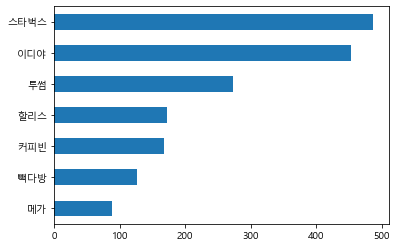

In [150]:
# 주요 커피 브랜드 서울 입점 점포수 비교
seoul_sum['스타벅스':'메가'].sort_values().plot(kind='barh')

<AxesSubplot:>

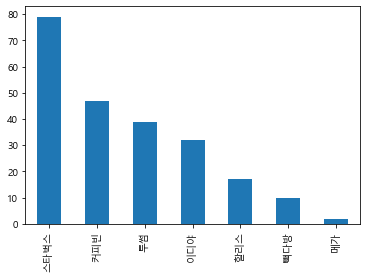

In [153]:
# 주요 커피 브랜드 강남구 입점 점포수 비교
seoul_df.loc['강남구','스타벅스':'메가'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:ylabel='스타벅스'>

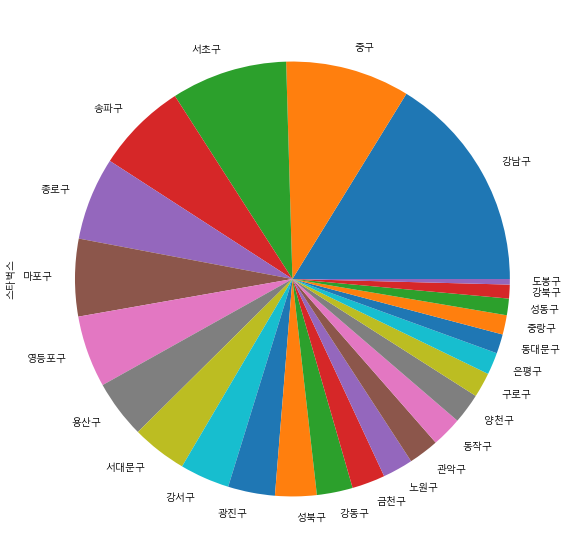

In [155]:
# 각 구별 스타벅스 입점 점포수 비교
seoul_df['스타벅스'].plot(kind='pie',figsize=(10,10))

<AxesSubplot:ylabel='이디야'>

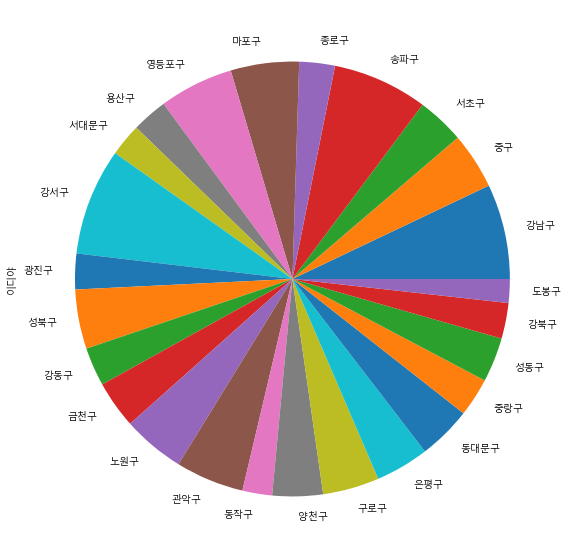

In [156]:
# 각 구별 이디야 입점 점포수 비교
seoul_df['이디야'].plot(kind='pie',figsize=(10,10))

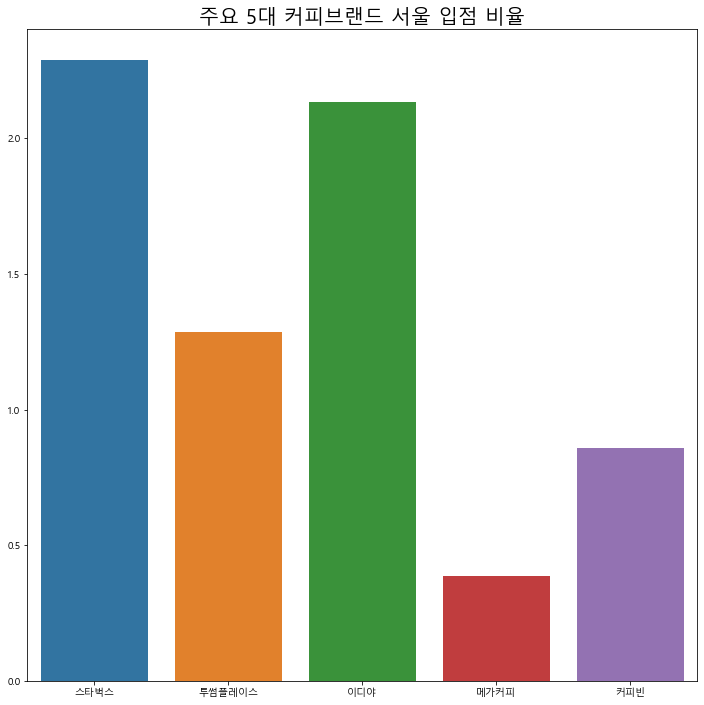

In [35]:
# 주요 5대 커피브랜드 서울 입점 비율을 시각화합니다.
starbucks_rate = (len(df_seoul_starbucks) / len(df_seoul_coffee) * 100)
ediya_rate = (len(df_seoul_ediya) / len(df_seoul_coffee)* 100)
coffeebean_rate = (len(df_seoul_coffeebean) / len(df_seoul_coffee)* 100)
twosome_rate = (len(df_seoul_2some) / len(df_seoul_coffee)* 100)
mega_rate = (len(df_seoul_mega) / len(df_seoul_coffee)* 100)


# starbucks_rate = (len(df_seoul_starbucks) / len(df_starbucks) * 100)
# twosome_rate = (len(df_seoul_2some) / len(df_2some) * 100)
# ediya_rate = (len(df_seoul_ediya) / len(df_ediya) * 100)
# mega_rate = (len(df_seoul_mega) / len(df_mega) * 100)
# coffeebean_rate = (len(df_seoul_coffeebean) / len(df_coffeebean) * 100)

X = ["스타벅스", "투썸플레이스", "이디야" ,"메가커피" ,"커피빈"]
y = [starbucks_rate, twosome_rate, ediya_rate, mega_rate, coffeebean_rate]

plt.figure(figsize=(12, 12))
plt.title("주요 5대 커피브랜드 서울 입점 비율", fontdict={"fontsize" : 20})
sns.barplot(x=X, y=y)
plt.savefig("coffee_barplot.png")
plt.show()

### (Challenge) More Prettier!

In [36]:
# 위의 barplot을 seaborn을 이용하여 더욱 멋지게 시각화해보세요!